In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [15]:
# Name of the directory on Google Drive for saving training log, loss/mAP chart,
# and weights
SAVE_DIR = 'yolov4_test'

# Path of the Google Drive mount point
DRIVE_DIR = '/content/drive/MyDrive/IntroToAI/FinalProject'

# Full path to the save directory on Google Drive
DRIVE_SAVE_DIR = DRIVE_DIR + '/' + SAVE_DIR

# Input shape {width}*{height} of the yolov4 model to be trained
INPUT_SHAPE = '416x416'

In [16]:
#Check and make sure Google Drive has been mounted before proceeding.
from pathlib import Path
assert Path(DRIVE_DIR).is_dir(), 'Google Drive has not been mounted?'

In [17]:
%cd /content/drive/MyDrive/IntroToAI/FinalProject
if not Path('yolov4_test').is_dir():
    !mkdir yolov4_test

/content/drive/MyDrive/IntroToAI/FinalProject


In [18]:
%cd /content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test

if not Path('dataset100.zip').is_file():
  print("Download dataset100.zip")
  !wget http://foodcam.mobi/dataset100.zip

if not Path('UECFOOD100_raw').is_dir():
  print("Unzip dataset100.zip")
  !unzip -n dataset100.zip
  !mv UECFOOD100/ UECFOOD100_raw/ 

/content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test


In [6]:
## Caution! Do not run this cell if you have run this file already!!!!
%cd /content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test

if not Path('food100_generate_txt.py').is_file():
  print("no file")
else :
  !python3 food100_generate_txt.py

/content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test
class 1...
class 2...
class 3...
class 4...
class 5...
class 6...
class 7...
class 8...
class 9...
class 10...
class 11...
class 12...
class 13...
class 14...
class 15...
class 16...
class 17...
class 18...
class 19...
class 20...
class 21...
class 22...
class 23...
class 24...
class 25...
class 26...
class 27...
class 28...
class 29...
class 30...
class 31...
class 32...
class 33...
class 34...
class 35...
class 36...
class 37...
class 38...
class 39...
class 40...
class 41...
class 42...
class 43...
class 44...
class 45...
class 46...
class 47...
class 48...
class 49...
class 50...
class 51...
class 52...
class 53...
class 54...
class 55...
class 56...
class 57...
class 58...
class 59...
class 60...
class 61...
class 62...
class 63...
class 64...
class 65...
class 66...
class 67...
class 68...
class 69...
class 70...
class 71...
class 72...
class 73...
class 74...
class 75...
class 76...
class 77...
class 78...
class 79...
cla

In [7]:
drive.flush_and_unmount()

In [19]:
%cd /content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test/UECFOOD100/

if not Path('test.txt').is_file():
  !python3 ../food100_split_for_yolo.py
else:
  print('Skip splitting')

/content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test/UECFOOD100
Skip splitting


In [6]:
# Caution: Do not run this cell if you don't want to reinstall darknet
%cd /content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test
!rm -rf darknet
!git clone https://github.com/AlexeyAB/darknet.git

/content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test
Cloning into 'darknet'...
remote: Enumerating objects: 15521, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15521 (delta 0), reused 5 (delta 0), pack-reused 15514
Receiving objects: 100% (15521/15521), 14.19 MiB | 14.00 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.
Updating files: 100% (2058/2058), done.


In [20]:
%cd /content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test/darknet
!sed -i "1s/GPU=0/GPU=1/"               Makefile
!sed -i "2s/CUDNN=0/CUDNN=1/"           Makefile
!sed -i "3s/CUDNN_HALF=0/CUDNN_HALF=1/" Makefile
!sed -i "4s/OPENCV=0/OPENCV=1/"         Makefile
!sed -i "5s/AVX=0/AVX=1/"               Makefile
!sed -i "7s/LIBSO=0/LIBSO=1/"           Makefile
!sed -i "20s/compute_30,code=sm_30 \\\/compute_37,code=sm_37 -gencode arch=compute_60,code=[sm_60,compute_60] -gencode arch=compute_61,code=[sm_61,compute_61] -gencode arch=compute_75,code=[sm_75,compute_75]/" Makefile
!sed -i "21s/^/#/"                      Makefile
!sed -i "22s/^/#/"                      Makefile
!sed -i "23s/^/#/"                      Makefile
!sed -i "24s/^/#/"                      Makefile
# Let darknet test mAP more frequently during training 
!sed -i "300s/calc_map_for_each = 4/calc_map_for_each = 1/" src/detector.c

!make

/content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -ffp-contract=fast -mavx -mavx2 -msse3 -msse4.1 -msse4.2 -msse4a -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_o

In [21]:
#!mkdir -p "{DRIVE_SAVE_DIR}"
!rm -f "{DRIVE_SAVE_DIR}"/train.log
!touch "{DRIVE_SAVE_DIR}"/train.log
!rm -f "{DRIVE_SAVE_DIR}"/chart.png
!touch "{DRIVE_SAVE_DIR}"/chart.png
#!rm -f chart.png
#!ln -sf "{DRIVE_SAVE_DIR}"/chart.png .
!rm -rf "{DRIVE_SAVE_DIR}"/darknet/backup
!mkdir "{DRIVE_SAVE_DIR}"/darknet/backup
#!ln -sf "{DRIVE_SAVE_DIR}"/backup .

In [22]:
#********Download pretrained from https://zenodo.org/record/3829035, pre-trained weights-file for training, move it to darknet/
#********Make link to data/crowdhuman is not working do it manually
%cd /content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test/darknet/

if not Path('data/food100.names').is_file():
  ! cp ../food100.names data/
else:
  print('Skipping the names file')
if not Path('data/food100.names').is_file():
  ! cp ../food100.data data/
else:
  print('Skipping the data file')
if not Path('cfg/yolov4-UECFOOD100.cfg').is_file():
  ! cp ../cfg/yolov4-UECFOOD100.cfg cfg/
else:
  print('Skipping the cfg file')
if not Path('yolov4.conv.137').is_file():
  print('There is no pre-trained weight file')

/content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test/darknet
Skipping the names file
Skipping the data file
Skipping the cfg file


In [ ]:
%cd /content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test/darknet
! chmod 755 darknet
! ./darknet detector train data/food100.data cfg/yolov4-UECFOOD100.cfg yolov4.conv.137 -gpus 0 -map -dont_show 2>&1 | tee "{DRIVE_SAVE_DIR}"/train.log | grep -E "hours left|mean_average"

/content/drive/MyDrive/IntroToAI/FinalProject/yolov4_test/darknet
 (next mAP calculation at 1000 iterations) ]2;1/200000: loss=1899.4 hours left=-1.0
 1: 1899.377686, 1899.377686 avg loss, 0.000000 rate, 6.906620 seconds, 64 images, -1.000000 hours left
 (next mAP calculation at 1000 iterations) ]2;2/200000: loss=1869.0 hours left=383.7
 2: 1868.957886, 1896.335693 avg loss, 0.000000 rate, 5.665519 seconds, 128 images, 383.702982 hours left
 (next mAP calculation at 1000 iterations) ]2;3/200000: loss=1842.3 hours left=383.0
 3: 1842.335083, 1890.935669 avg loss, 0.000000 rate, 5.601157 seconds, 192 images, 383.013604 hours left
 (next mAP calculation at 1000 iterations) ]2;4/200000: loss=1874.5 hours left=382.3
 4: 1874.469727, 1889.289062 avg loss, 0.000000 rate, 5.493548 seconds, 256 images, 382.295218 hours left
 (next mAP calculation at 1000 iterations) ]2;5/200000: loss=1873.9 hours left=381.5
 5: 1873.898926, 1887.750000 avg loss, 0.000000 rate, 5.402143 seconds, 320 im

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv 

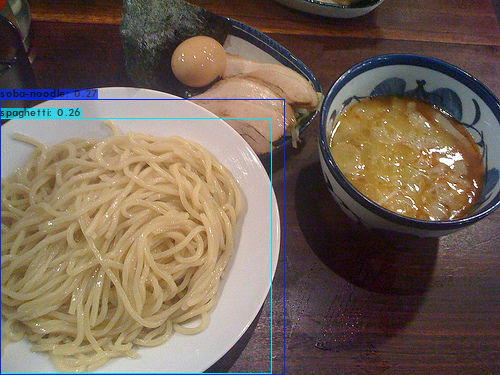

In [13]:
#!./darknet detector test data/crowdhuman-{INPUT_SHAPE}.data cfg/yolov4-crowdhuman-{INPUT_SHAPE}.cfg backup/yolov4-crowdhuman-{INPUT_SHAPE}_best.weights data/crowdhuman-{INPUT_SHAPE}/273275,4e9d1000623d182f.jpg -gpus 0 -dont_show
!./darknet detector test data/food100.data cfg/yolov4-UECFOOD100.cfg backup/yolov4-UECFOOD100_last.weights data/UECFOOD100/12821.jpg -gpus 0 -dont_show

from IPython.display import Image
Image('predictions.jpg')